In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

#classification(분류)
from sklearn.tree import DecisionTreeClassifier      #의사결정트리
from sklearn.ensemble import RandomForestClassifier  #랜덤포레스트
from sklearn.neighbors import KNeighborsClassifier   #KNN(K_Nearst_Neighbor)K-최근접이웃
from sklearn.linear_model import LogisticRegression  #로지스틱회귀
from sklearn.svm import SVC                          #SVM(Support_Vector_Machine)서포트벡터머신


from sklearn.metrics import confusion_matrix      #혼동행렬
from sklearn.metrics import accuracy_score        #정확도
from sklearn.metrics import precision_score     #정밀도
from sklearn.metrics import recall_score        #재현율
from sklearn.metrics import f1_score            #f1
from sklearn.metrics import roc_auc_score       #roc_auc
from sklearn.metrics import classification_report #종합

In [2]:
path = ''
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
target = pd.read_csv(path + 'submission_sample.csv')

In [3]:
print("train:", train.shape)  # open:1, close:0
print("test:", test.shape)

train: (301, 58)
test: (127, 58)


### <span style="color:red"> train: test =7:3으로 분리 </span>

## 데이터 전처리
- 우선 모든 변수를 넣고 DecisionTree와 RandomForest 분석하여 변수 중요도를 파악할 예정
- DT와 RF모델링을 위한 전처리와 인코딩 작업

In [4]:
target.head()

,inst_id,OC
0,2,0
1,5,0
2,6,0
3,8,0
4,10,0


In [5]:
df_train = train[:]
df_test = test[:]
df_test['OC'] = target['OC']

# 타겟 변수 데이터 만들기
df_train_close =df_train.loc[df_train['OC'] == ' close']
df_test_close =df_test.loc[df_test['OC'] == ' close']
print("train:", df_train.shape)
print("test:", df_test.shape)

train: (301, 58)
test: (127, 58)


In [6]:
# 불필요한 id는 제외
df_train.drop('inst_id',axis =1, inplace=True)
df_test.drop('inst_id', axis = 1, inplace=True)

#### 병원 종류 별로 값이가 남
예를 들어 종합병원과 일반 클리닉의 침대 병상 수는 차이가 있음
따라서 결측치는 병원 종류별로 Group By하여 평균을 구해 결측치 대체

### <span style="color:red">결측 대체 </span>
- 병원 종류 평균으로 대체
- 병원 종류가 없는 1개는 행 삭제

In [7]:
df_train.isnull().sum()

OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8
liquidAsset2           8


In [8]:
df_test.isnull().sum()

OC                     0
sido                   0
sgg                    0
openDate               1
bedCount               8
instkind               2
revenue1               2
salescost1             2
sga1                   2
salary1                2
noi1                   2
noe1                   2
interest1              2
ctax1                  2
profit1                2
liquidAsset1           2
quickAsset1            2
receivableS1           2
inventoryAsset1        2
nonCAsset1             2
tanAsset1              2
OnonCAsset1            2
receivableL1           2
debt1                  2
liquidLiabilities1     2
shortLoan1             2
NCLiabilities1         2
longLoan1              2
netAsset1              2
surplus1               2
revenue2               2
salescost2             2
sga2                   2
salary2                2
noi2                   2
noe2                   2
interest2              2
ctax2                  2
profit2                2
liquidAsset2           2


In [9]:
# ownerChange Null 로 결측값 입력
df_train['ownerChange'].fillna('null', inplace = True)
df_test['ownerChange'].fillna('null', inplace = True)
df_train['ownerChange'].isnull().sum() 

0

데이터 수가 적기 때문에 ownerChange를 null로 데이터를 유지하여 분석함

In [10]:
# 병원 종류가 없는 행 삭제 
df_train = df_train[df_train['instkind'].isnull() == False]

In [11]:
# group by하여 평균 구해서 결측치 대체
fill_mean_func = lambda g: g.fillna(g.mean())
df_train = df_train.groupby('instkind').apply(fill_mean_func)
df_test = df_test.groupby('instkind').apply(fill_mean_func)
df_train.isnull().sum()

OC                    0
sido                  0
sgg                   0
openDate              0
bedCount              0
instkind              0
revenue1              0
salescost1            0
sga1                  0
salary1               0
noi1                  0
noe1                  0
interest1             0
ctax1                 0
profit1               0
liquidAsset1          0
quickAsset1           0
receivableS1          0
inventoryAsset1       0
nonCAsset1            0
tanAsset1             0
OnonCAsset1           0
receivableL1          0
debt1                 0
liquidLiabilities1    0
shortLoan1            0
NCLiabilities1        0
longLoan1             0
netAsset1             0
surplus1              0
revenue2              0
salescost2            0
sga2                  0
salary2               0
noi2                  0
noe2                  0
interest2             0
ctax2                 0
profit2               0
liquidAsset2          0
quickAsset2           0
receivableS2    

In [12]:
df_test[df_test['instkind']=='traditional_hospital']

,,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
instkind,,,,,,,,,,,,,,,,,,,,,,
traditional_hospital,123,0,gyeonggi,74,20010530.0,NaN,traditional_hospital,1.833906e+10,0.0,1.760117e+10,6.824241e+09,...,3.176628e+09,1.376742e+09,0.0,1.799886e+09,1.740000e+09,8.574502e+09,7.136681e+09,132.0,137.0,same


In [13]:
df_test['bedCount'].fillna(0, inplace=True)

Trainditional_hosipital 병원의 평균이 없어서 0으로 대체

## LabelEncoder

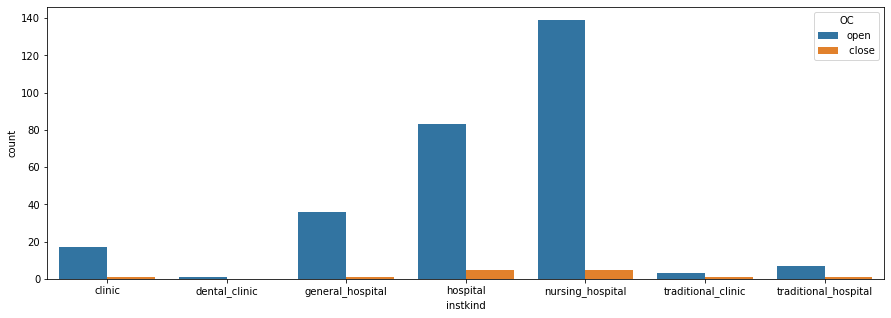

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'instkind', hue = 'OC', data = df_train)
plt.show()

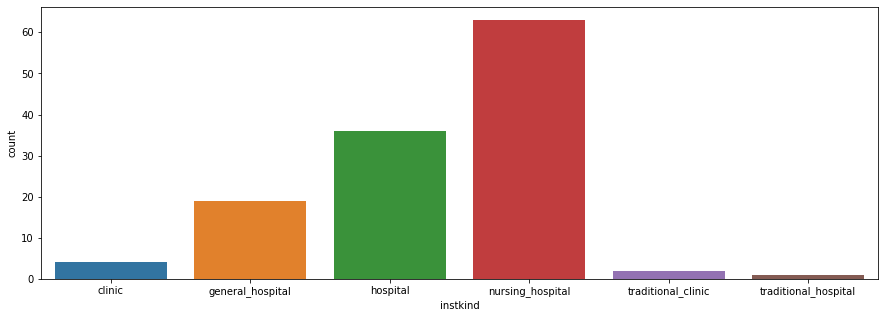

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'instkind', data = df_test)

In [16]:
df_train['instkind'].value_counts()

nursing_hospital        144
hospital                 88
general_hospital         37
clinic                   18
traditional_hospital      8
traditional_clinic        4
dental_clinic             1
Name: instkind, dtype: int64

In [17]:
df_train['openDate'] =  df_train['openDate'].apply(lambda x: str(x)[:4])
df_train['OC'].replace({'open':1, ' close':0}, inplace =True) #target(submission.csv 기준으로 인코딩으로)
df_train['sgg'] = df_train['sgg'].astype(object)

df_test['openDate'] =  df_test['openDate'].apply(lambda x: str(x)[:4])
df_test['sgg'] = df_test['sgg'].astype(object)

In [18]:
objects =['sido','instkind', 'ownerChange']

le = LabelEncoder()
for column in objects:
    le.fit(df_train[column])
    df_train[column] = le.transform(df_train[column])

    
for column in objects:
    le.fit(df_test[column])
    df_test[column] = le.transform(df_test[column])


In [19]:
objects =['inst_id','OC','sido','sgg','openDate','instkind','ownerChange']
df_train.head()

OC  sido  sgg openDate  bedCount  instkind      revenue1  \
instkind                                                                 
clinic   39    1     8  120     2005       0.0         0  1.510000e+11   
         68    1     8   80     2012       0.0         0  2.600028e+09   
         110   1     8   18     2012       0.0         0  2.097084e+10   
         120   1     4   47     1984       0.0         0  1.889868e+09   
         138   1     7  132     2009      29.0         0  2.544681e+09   

                salescost1          sga1       salary1  ...         debt2  \
instkind                                                ...                 
clinic   39   9.850332e+10  4.954776e+10  3.726935e+09  ...  3.019425e+10   
         68   2.147255e+08  2.483782e+09  1.095681e+09  ...  4.232660e+09   
         110  1.146890e+10  8.325001e+09  4.065724e+09  ...  9.744442e+09   
         120  1.128316e+08  1.694670e+09  1.077318e+09  ...  1.627828e+09   
         138  1.854037e+08  2.162553e+09  1.386497e+09  ...  1.819302e+09   

              liquidLiabilities2    shortLoan2  NCLiabilities2     longLoan2  \
instkind                                                                       
clinic   39         2.151760e+10  0.000000e+00    8.676656e+09  0.000000e+00   
         68         3.818990e+09  2.730000e+09    4.136694e+08  0.000000e+00   
         110        5.257777e+09  1.345786e+09    4.486666e+09  2.230000e+09   
         120        1.627828e+09  1.078103e+09    0.000000e+00  0.000000e+00   
         138        8.193017e+08  6.300000e+08    1.000000e+09  1.000000e+09   

                 netAsset2     surplus2  employee1  employee2  ownerChange  
instkind                                                                    
clinic   39   2.846885e+10   43194221.0      454.0      425.0            2  
         68   1.868636e+09  259263363.0       40.0       40.0            2  
         110  1.790415e+09          0.0      152.0      127.0            2  
         120  8.421260e+08          0.0       35.0       32.0            2  
         138  1.156666e+09   35135410.0       20.0       19.0            2  

[5 rows x 57 columns]

###  오픈년도 cutting 하기
* 특정 연도에 오픈을 했다는 것이 분류에 의미가 없을 것 같음
* 그래서 90년이하, 2000년대, 2010년 이상으로 연도 cutting 함

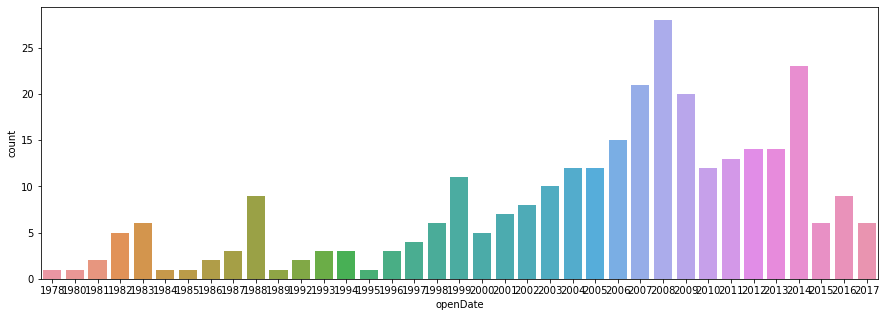

In [20]:
# 오픈년도 cutting으로 구간 주기
df_train['openDate'] =  df_train['openDate'].apply(lambda x: str(x)[:4])
plt.figure(figsize=(15,5))
sns.countplot('openDate', data = df_train)

In [21]:
print('Min:', min(df_train['openDate']))
print('Max:', max(df_train['openDate']))

Min: 1978
Max: 2017


In [22]:
df_train['openDate'] =df_train['openDate'].astype(float)
df_train['open_cut'] = pd.cut(df_train.openDate, bins = [1976, 1999,2009,2017], labels= ['90','00','10']) # 90년대 이전, 00년대, 10년대 이후

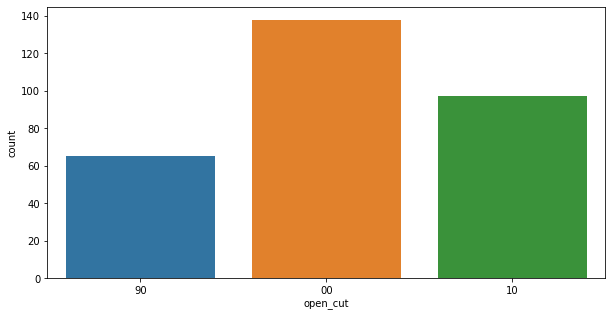

In [23]:
plt.figure(figsize=(10,5))
sns.countplot('open_cut', data = df_train)

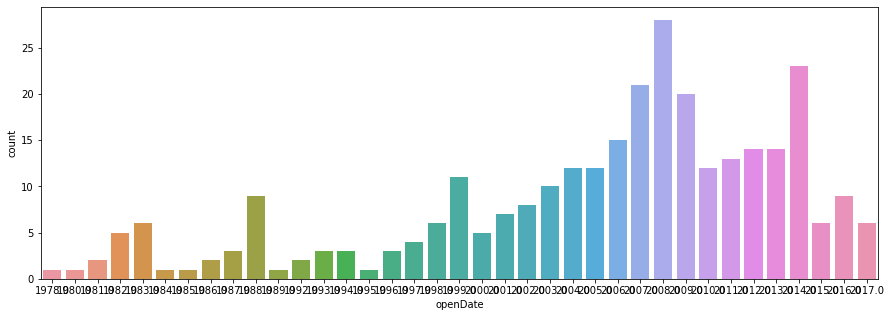

In [24]:
# 년도 cutting으로 구간 주기
df_test['openDate'] =  df_test['openDate'].apply(lambda x: str(x)[:4])
plt.figure(figsize=(15,5))
sns.countplot('openDate', data = df_train)

In [25]:
print('Min:', min(df_test['openDate']))
print('Max:', max(df_test['openDate']))

Min: 1976
Max: 2017


In [26]:
df_test['openDate'] =df_test['openDate'].astype(float)
df_test['open_cut'] = pd.cut(df_test.openDate, bins = [1975,1999,2009,2018], labels= ['90','00','10']) # 90년대 이전, 00년대, 10년대 이후

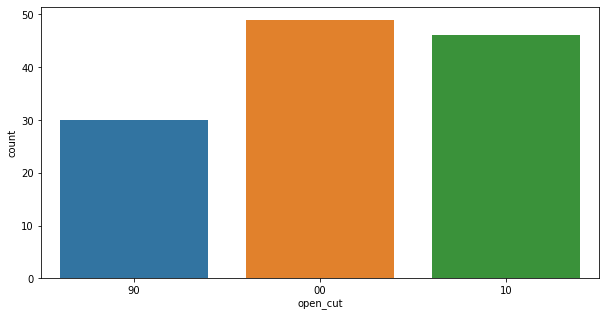

In [27]:
plt.figure(figsize=(10,5))
sns.countplot('open_cut', data = df_test)

## 회계데이터 상관성 파악하기

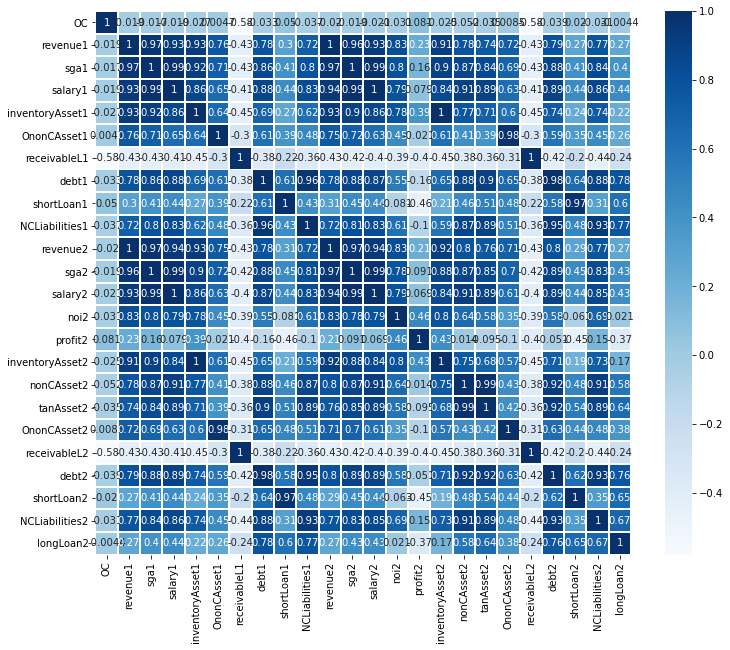

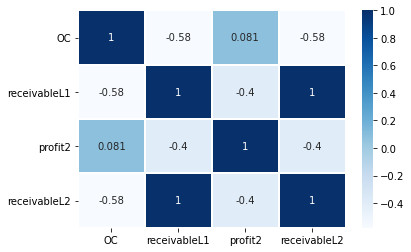

In [28]:
columns = ['OC','revenue1','salescost1', 'sga1', 'salary1', 'noi1', 'noe1', 'interest1', 'ctax1',
       'profit1', 'liquidAsset1', 'quickAsset1', 'receivableS1',
       'inventoryAsset1', 'nonCAsset1', 'tanAsset1', 'OnonCAsset1',
       'receivableL1', 'debt1', 'liquidLiabilities1', 'shortLoan1',
       'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1', 'revenue2',
       'salescost2', 'sga2', 'salary2', 'noi2', 'noe2', 'interest2', 'ctax2',
       'profit2', 'liquidAsset2', 'quickAsset2', 'receivableS2',
       'inventoryAsset2', 'nonCAsset2', 'tanAsset2', 'OnonCAsset2',
       'receivableL2', 'debt2', 'liquidLiabilities2', 'shortLoan2',
       'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2', 'employee1',
       'employee2']

data = df_train[columns].corr()

plt.figure(figsize = (12,10))
corr_features = data.index[abs(data["OC"])>=0.05]
sns.heatmap(data[corr_features].corr(), annot =True, cmap = 'Blues', linewidth = 1)
plt.show()

corr_features = data.index[abs(data["OC"])>=0.1]
sns.heatmap(data[corr_features].corr(), annot =True, cmap = 'Blues', linewidth = 1)

## Modeling
-------

In [29]:
df_train.columns

Index(['OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind', 'revenue1',
       'salescost1', 'sga1', 'salary1', 'noi1', 'noe1', 'interest1', 'ctax1',
       'profit1', 'liquidAsset1', 'quickAsset1', 'receivableS1',
       'inventoryAsset1', 'nonCAsset1', 'tanAsset1', 'OnonCAsset1',
       'receivableL1', 'debt1', 'liquidLiabilities1', 'shortLoan1',
       'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1', 'revenue2',
       'salescost2', 'sga2', 'salary2', 'noi2', 'noe2', 'interest2', 'ctax2',
       'profit2', 'liquidAsset2', 'quickAsset2', 'receivableS2',
       'inventoryAsset2', 'nonCAsset2', 'tanAsset2', 'OnonCAsset2',
       'receivableL2', 'debt2', 'liquidLiabilities2', 'shortLoan2',
       'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2', 'employee1',
       'employee2', 'ownerChange', 'open_cut'],
      dtype='object')

In [43]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
# df_test.columns.difference(['OC'])

x_train = df_train[df_test.columns.difference(['OC'])]
y_train = df_train['OC']
x_test = df_test[df_test.columns.difference(['OC'])]
y_test = df_test['OC']

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

x_train: (300, 57)
x_test: (125, 57)


In [32]:
dt_clf = DecisionTreeClassifier(random_state=0)   #random_state 동일한 결과 반환

In [33]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [44]:
y_train

instkind                 
clinic                39     1
                      68     1
                      110    1
                      120    1
                      138    1
                            ..
traditional_hospital  121    1
                      170    1
                      205    1
                      265    1
                      300    1
Name: OC, Length: 300, dtype: int64

In [34]:
x_test

NCLiabilities1  NCLiabilities2   OnonCAsset1  \
instkind                                                                 
clinic               19     1.642333e+10    3.717800e+09  2.983697e+09   
                     21     6.808015e+09    5.147217e+09  5.460780e+08   
                     87     1.276513e+09    1.284252e+09  5.100000e+06   
                     111    3.000000e+07    4.100000e+07  2.030643e+08   
general_hospital     0      1.343002e+10    4.720000e+09  7.463122e+08   
...                                  ...             ...           ...   
nursing_hospital     119    3.919771e+09    4.033884e+09  1.160000e+07   
                     121    2.446269e+07    9.731573e+08  0.000000e+00   
traditional_clinic   10     3.817340e+10    4.727596e+10  9.400293e+08   
                     122    2.967635e+09    2.750371e+09  3.124156e+08   
traditional_hospital 123    4.544296e+07    1.799886e+09  2.400000e+08   

                           OnonCAsset2  bedCount         ctax1        ctax2  \
instkind                                                                      
clinic               19   2.418737e+09       0.0  1.000244e+09  785705260.0   
                     21   5.470780e+08      16.0  2.185154e+08  150124208.0   
                     87   5.100000e+06      12.0  0.000000e+00          0.0   
                     111  2.028664e+08      20.0  3.329587e+06    2338800.0   
general_hospital     0    7.963862e+08     300.0  7.668000e+07  218399804.0   
...                                ...       ...           ...          ...   
nursing_hospital     119  1.745000e+07     136.0  0.000000e+00          0.0   
                     121  0.000000e+00     167.0  8.752055e+06          0.0   
traditional_clinic   10   9.805293e+08       0.0  2.385184e+08          0.0   
                     122  3.104156e+08       0.0  4.158945e+08  553752070.0   
traditional_hospital 123  1.337800e+08       0.0  6.903334e+08  161647510.0   

                                 debt1         debt2  employee1  ...  \
instkind                                                         ...   
clinic               19   4.331264e+10  3.051746e+10      431.0  ...   
                     21   1.410975e+10  1.173346e+10      361.0  ...   
                     87   2.646999e+09  2.170056e+09       52.0  ...   
                     111  1.051008e+08  1.163008e+08       16.0  ...   
general_hospital     0    6.769090e+10  5.540643e+10      693.0  ...   
...                                ...           ...        ...  ...   
nursing_hospital     119  4.369718e+09  4.729688e+09       49.0  ...   
                     121  5.800356e+07  1.022401e+09      111.0  ...   
traditional_clinic   10   5.704074e+10  6.241929e+10      532.0  ...   
                     122  1.582736e+10  1.563217e+10      560.0  ...   
traditional_hospital 123  1.938710e+09  3.176628e+09      132.0  ...   

                                  sga1          sga2  sgg    shortLoan1  \
instkind                                                                  
clinic               19   3.392822e+10  2.999109e+10  142  6.456323e+09   
                     21   1.449250e+10  1.262196e+10   87  5.055822e+09   
                     87   3.734032e+09  3.814299e+09   24  0.000000e+00   
                     111  1.064146e+09  1.002233e+09  140  0.000000e+00   
general_hospital     0    6.565709e+10  6.261126e+10  139  3.805927e+10   
...                                ...           ...  ...           ...   
nursing_hospital     119  2.657350e+09  1.768654e+09  165  0.000000e+00   
                     121  2.581514e+08  3.153264e+08  177  0.000000e+00   
traditional_clinic   10   5.177418e+10  4.135528e+10  169  1.096604e+10   
                     122  1.849255e+10  1.805503e+10   33  0.000000e+00   
traditional_hospital 123  1.760117e+10  1.824717e+10   74  0.000000e+00   

                            shortLoan2  sido      surplus1      surplus2  \
instkind                                      

In [35]:
dt_pred = dt_clf.predict(x_test)
#print('DecisionTree:', accuracy_score(y_test, dt_pred).round(4))

In [36]:
dt_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0556135 , 0.        , 0.03746254, 0.        ,
       0.06555944, 0.        , 0.        , 0.        , 0.01290376,
       0.        , 0.        , 0.        , 0.        , 0.12515893,
       0.        , 0.        , 0.10158701, 0.05994006, 0.        ,
       0.08741259, 0.        , 0.06078123, 0.09807609, 0.08727636,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06182178,
       0.08741259, 0.        , 0.04995005, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00904407, 0.        ,
       0.        , 0.        ])

<span style="color:red"> ... </span>

In [37]:
rf_clf = RandomForestClassifier(n_estimators= 10, oob_score= True,random_state=0)

In [38]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=0)

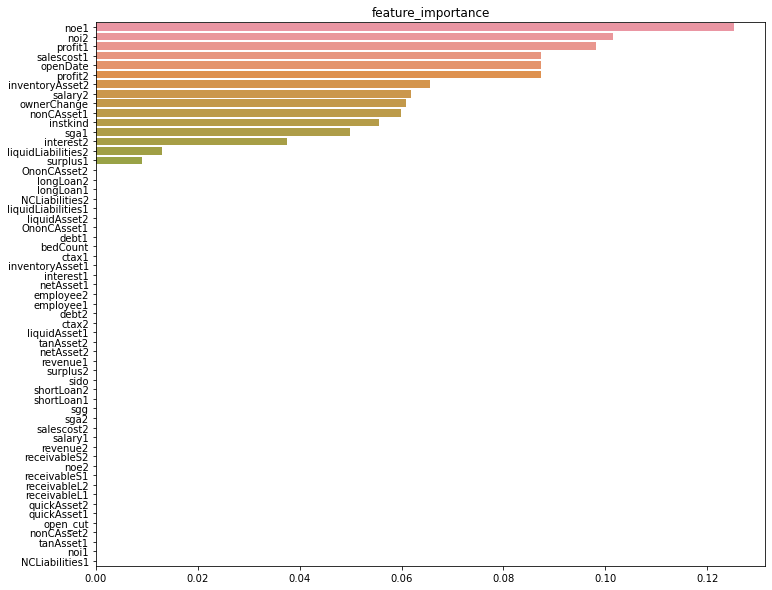

In [39]:
train_columns = df_train.columns.difference(['OC'])
importance_sr = pd.Series(dt_clf.feature_importances_, index=train_columns)
importance_sr.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x=importance_sr.values, y=importance_sr.index)
plt.title('feature_importance')
plt.show()

noe(영업외 비용), noi(영업외 수입), profit, salecost, receivablel(장기미수금)

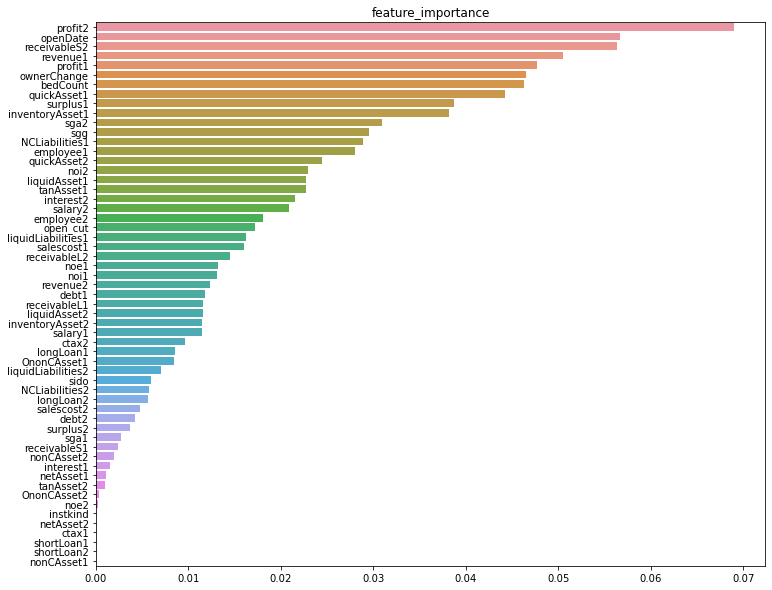

In [40]:
train_columns = df_train.columns.difference(['OC'])
importance_sr = pd.Series(rf_clf.feature_importances_, index=train_columns)
importance_sr.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x=importance_sr.values, y=importance_sr.index)
plt.title('feature_importance')
plt.show()